## Chapter 3. The Restricted Three Body Problem

### Action by Diego.A Acosta, University of Antioquia

In this notebook we will present part of the theoretical background of the chapter devoted to the Three body problem and some mathematical and numerical results which are interested for the theory.

For details on the theory please refer directly to the book:

    Murray, C. D., & Dermott, S. F. (1999). Solar system dynamics. Cambridge university press.



### Libraries


In [88]:
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import sympy as sym

We use a class in the notebook for simplicity, all the methods are in the file crtbp.py

In [89]:
from crtbp import Crtbp # Circular Restricted Three Body Problem

In [90]:
## !pip install spiceypy -q (Collab)
# !pip install celluloid -q (Collab) 
from spiceypy import rotate,mxv
from scipy.integrate import solve_ivp
from IPython.core.display import HTML
import ipywidgets as widgets

### SECTION 3.2 Equation of Motion

Is chosen a units system with the condition $G(m_1+m_2) = 1$ and defined the value

\begin{equation} \tag{3.1} 
\mu = \frac{m_2}{m_1+m_2}
\end{equation}

In this system the two masses are

\begin{equation} \tag{3.2}
\mu_1 = 1- \mu \qquad \text{and} \qquad \mu_2 =  \mu
\end{equation}

<img src="resources/images/Planar view.png" width="600" >

With these changes and setting the distance between the two masses equal to $1$. The vectors to the test particle are

\begin{equation} \tag{3.8}
r_1^2 = (x + \mu_2)^2 + y^2 + z^2
\end{equation}

\begin{equation} \tag{3.9}
r_2^2 = (x - \mu_1)^2 + y^2 + z^2
\end{equation}

the equations of motion in the synodic frame become

\begin{equation} \tag{3.1.6} 
\ddot{x}-2 n \dot{y}-n^2 x =-\left(\mu_1 \frac{x+\mu_2}{r_1^3}+\mu_2 \frac{x-\mu_1}{r_2^3}\right)
\end{equation}

\begin{equation} \tag{3.1.7} 
\ddot{y}+2 n \dot{x}-n^2 y  =-\left[\frac{\mu_1}{r_1^3}+\frac{\mu_2}{r_2^3}\right] y 
\end{equation}

\begin{equation} \tag{3.1.8} 
 \ddot{z}  =-\left[\frac{\mu_1}{r_1^3}+\frac{\mu_2}{r_2^3}\right] z 
\end{equation}



*   $x,y,z$ = Position vector
*   $\dot{x}, \dot{y}, \dot{z}$ = Velocity vector
*   $n$ = Mean motion
*   $r_1, r_2$ = Position of test particle respect to $m_1$ and $m_2$
*   $\mu_1$ = 1 - $\mu$
*   $\mu2$ = $\mu$

An example system with transfer between two bodies

In [147]:
X0 = np.array([1.1,0,0,-0.1,0.2,0]) # x, y, z, vx, vy, vz
t = 30
mu = 0.02
dt = 400

Once the initial conditions and the propagation are set, we can use the function to propagate this conditions

In [148]:
system = Crtbp(X0,mu)
X_synodic,t_span = system.propagate(t,dt)

Also this need coordinates transformations

\begin{equation}  \tag{3.10}

\begin{pmatrix*}
\cos n t & -\sin n t & 0 \\
\sin n t & \cos n t & 0 \\
0 & 0 & 1
\end{pmatrix*} \begin{pmatrix*}
x \\
y \\
z
\end{pmatrix*}=
\begin{pmatrix}
\xi \\
\eta \\
\zeta
\end{pmatrix}

\end{equation}

When the inertial frame is rotated, in the new velocity vector appears and 


For the velocity vectors we can use to obtain

\begin{equation} \tag{3.11}

\begin{pmatrix}
\cos n t & -\sin n t & 0 \\
\sin n t & \cos n t & 0 \\
0 & 0 & 1
\end{pmatrix}
\begin{pmatrix}
\dot{x}-n y \\
\dot{y}+n x \\
\dot{z}
\end{pmatrix}= 
\begin{pmatrix}
\dot{\xi} \\
\dot{\eta} \\
\dot{\zeta}
\end{pmatrix}

\end{equation}


To get the inertial coordinates we do the inverse

In [92]:
r1, r2, X_inertial = Crtbp.Syn2Ine(X_synodic,t_span,mu)

If you have the coordinates in the inertial frame and want to pass to synodic frame use the function **Crbbp.Ine2Syn**

In [93]:
X_synodic = Crtbp.Ine2Syn(X_inertial,t_span)

#### Animation of the movement in both frames 

In [94]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4.5), tight_layout=True)

axs = (ax1,ax2)
Xs = [X_inertial,X_synodic]

def graph_orbit(ti):
    global  X_synodic, X_inertial
    for i in range(2):
        # Plotting the test particle position and limits for gragh
        axs[i].cla()
        axs[i].plot(Xs[i][0,ti],Xs[i][1,ti],'bo')
        axs[i].plot(Xs[i][0,:ti],Xs[i][1,:ti],'b--')
        axs[i].set_xlim(min(Xs[i][0,:])*1.1,max(Xs[i][0,:])*1.1)
        axs[i].set_ylim(min(Xs[i][1,:])*1.1,max(Xs[i][1,:])*1.1)
        axs[i].set_xlabel('x (Lenght units)')
        axs[i].set_ylabel('y (Lenght units)')

    ax1.plot(r1[0,ti],r1[1,ti],'ro')
    ax1.plot(r2[0,ti],r2[1,ti],'go')
    ax1.set_title('Inertial Frame')

    ax2.plot(mu,0,'ro')
    ax2.plot(1-mu,0,'go')
    ax2.set_title('Rotating Frame')



anim = animation.FuncAnimation(fig, graph_orbit,frames = np.arange(dt), blit=False, interval=50,
                              repeat=True) 
plt.close()

In [95]:
#anim.save('resources/animations/demostration_system.mp4')

In [96]:
HTML("""
<video width="1200" height="400" controls>
#   <source src="resources/animations/demostration_system.mp4" type="video/mp4">
</video>
""")

### SECTION 3.3 Jacobi Integral

\begin{equation} \tag{3.29}
C_J = x^2+y^2+2\left( \frac{\mu_1}{r_1} + \frac{\mu_2}{r_2}\right) - \dot{x}^2-\dot{y}^2-\dot{z}^2 
\end{equation}

**Since this point, we assume z = 0**

The Jacobi constant give us an expression to find where a particle can goes by setting his speed bigger than zero and find those regions where this happens 

Using the same last system, $\mu = 0.02$.  $r_0 = [1.1, 0, 0]$, $v_0 = [-0.1,0.2,0]$

This problem must respect the Jacobi Constant, here we show the value of the constant in the past of time

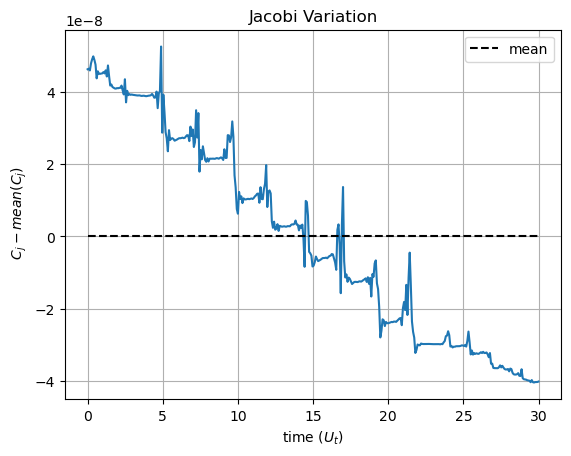

In [149]:
Cjs = Crtbp.get_Jacobi(X_synodic,mu)

fig, ax = plt.subplots()
ax.plot(t_span,Cjs-Cjs.mean())

ax.set_xlabel(r'time ($U_t$)')
ax.set_ylabel(r'$\ C_j - mean(C_j)$')
ax.grid()
ax.set_title('Jacobi Variation')
ax.hlines(0,0,t,linestyles='dashed', colors = 'k', label = 'mean')
ax.legend()
plt.show()

Jacobi constant is preserved over time with fluctuations generated by numerical integration

The regions reachables by a particle are described  with  $0\geq v$. In the Jacobi expression:

\begin{equation} \tag{3.39}
n^2(x^2+y^2)+2\left( \frac{\mu_1}{r_1} + \frac{\mu_2}{r_2}\right) = C_j
\end{equation}

#### Animated demostration of excluded regions

First we find the value of the jacobi constant for each pair 

In [98]:
x = np.linspace(-2,2,50)
y = np.linspace(-2,2,50)


X,Y = np.meshgrid(x,y)

Cj = system.jacobi
mu1 = 1-mu
mu2 = mu

r1 = np.sqrt((X+mu2)**2+Y**2)
r2 = np.sqrt((X-mu1)**2+Y**2)

Z = X**2+Y**2+2*(mu1/r1+mu2/r2)-Cj

Then we plot the curves of Jacobi constant of the system and the forbidden regions

In [99]:
fig, ax = plt.subplots()
def graph_excluded(ti):
    ax.cla()
    ax.contour(X,Y,Z,levels=[0],colors='k',alpha = 0.3)
    ax.contourf(X,Y,Z,levels=[-100,0],colors='k',alpha = 0.2)
    ax.plot(X_synodic[0,ti],X_synodic[1,ti],'bo',markersize = 5)
    ax.plot(X_synodic[0,ti-10:ti],X_synodic[1,ti-10:ti],'b--',markersize = 0.1)
    ax.plot(-mu2,0,'ro')
    ax.plot(mu1,0,'go')
    ax.set_ylim(-2,2)
    ax.set_xlim(-2,2)
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.set_title('Excluded Regions $\mu = {}$'.format(mu))


anim = animation.FuncAnimation(fig, graph_excluded,frames = np.arange(dt), blit=False, interval=50,
                              repeat=True) 
plt.close()

In [100]:
#anim.save('resources/animations/excluded_regions.mp4')

In [101]:
HTML("""
<video width="1200" height="400" controls>
#   <source src="resources/animations/excluded_regions.mp4" type="video/mp4">
</video>
""")

#### **Zero Curves**

The zero curves are related to $\mu$ and give different possibles paths depending on the value of Jacobi Constant. A higher value of $J_c$ indicates more exluded regions

Stablish the mass ratio

In [102]:
mu = 0.2
mu1 = 1-mu
mu2 = mu


Create the values of x, y and find the value of Jacobi constant for each pair

In [103]:
x = np.linspace(-2,2,100)
y = np.linspace(-2,2,100)

X,Y = np.meshgrid(x,y)
r1 = np.sqrt((X+mu2)**2+Y**2)
r2 = np.sqrt((X-mu1)**2+Y**2)

Cj = X**2+Y**2+2*(mu1/r1+mu2/r2)

In [104]:
cj_s = np.linspace(3,3.9,300)

fig, ax = plt.subplots()

ax.plot(mu,0,'bo')
ax.plot(1-mu,0,'go')

def graph_levels(i):
    ax.contourf(X,Y,Cj,levels = [0,cj_s[i]],colors  = "k",alphas = 0.5)
    ax.set_title(r'$\mu = 0.2$   $Cj = {}$'.format(round(cj_s[i],3)))
anim = animation.FuncAnimation(fig, graph_levels,frames = range(len(cj_s)), blit=False, interval=30,
                              repeat=True) 
plt.close()

In [105]:
#anim.save('resources/animations/zero_level.mp4')

In [106]:
HTML("""
<video width="1200" height="400" controls>
#   <source src="resources/animations/zero_level.mp4" type="video/mp4">
</video>
""")

### SECTION 3.4 Tisserand Relation

An aproximation useful to identify objects before and after encounters with bodies, the Tisserand relation is preserved in all time and is a way of identify an object with different orbital parameters changed by encounters

\begin{equation} \tag{3.46}
\frac{1}{2a}+ \sqrt{a(1-e^2)}\cos{I} \approx constant
\end{equation}

The value of $h\cos{I}$ is obtained with. 

$$
\vec{v_S} \cdot (\vec{e_z}\times \vec{r_S}) = h\cos{I}
$$

We named here $\vec{v_S}, \vec{r_S}$ the sidereal position and velocity respectively

For a small value of $\mu$, in this case $0.02$, the tisserand relation is not a good aproximation, in real cases the value $\mu$ is smaller and can be considered the tisserand relation

In [107]:
tisserand = np.zeros_like(t_span)
for i,x in enumerate(X_synodic.T):
    tisserand[i] = Crtbp.get_tisserand(x,mu)

c:\Users\dalej\anaconda3\envs\Central\lib\site-packages\matplotlib\animation.py:879: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


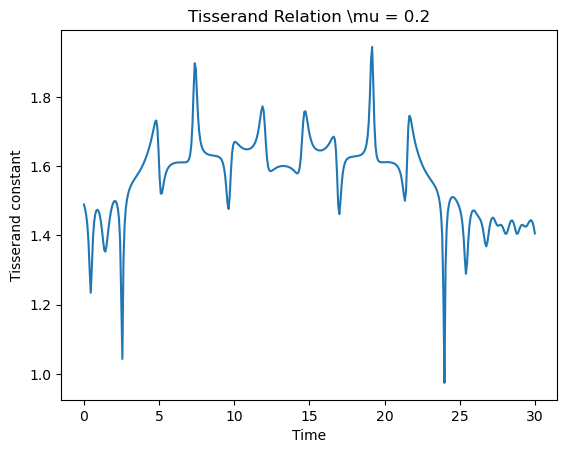

In [108]:
data = pd.DataFrame(np.array([t_span,tisserand]).T,columns = ['Time','Tisserand constant'])
sn.lineplot(data = data, x = 'Time', y = 'Tisserand constant').set(title = r'Tisserand Relation \mu = 0.2')
plt.show()

When we reduce the value of $\mu$, the tisserand parameter varies less. In real cases the value of $\mu$ is usually smaller than the actual, then it can be use this aproximation  

In [109]:
mu_s = [1e-3,1e-4,1e-5]

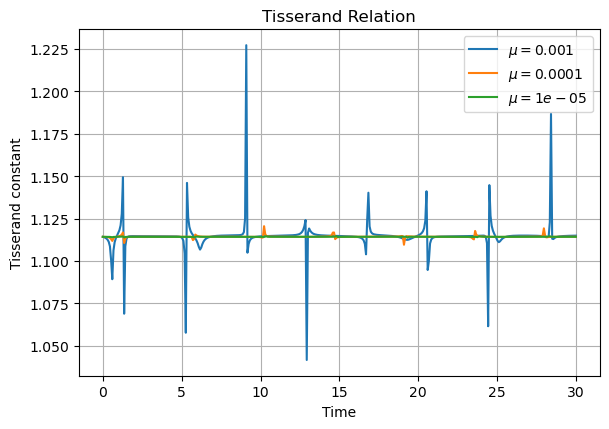

In [110]:
fig, ax = plt.subplots(figsize = (6,4))
Y0 = [1.2,0.5,0,0,-1,0]
for mu in mu_s:
    X_synodic_mu,t_span_mu = Crtbp(Y0,mu).propagate(t,dt)
    tisserand = np.zeros_like(t_span)
    for i,x in enumerate(X_synodic_mu.T):
        tisserand[i] = Crtbp.get_tisserand(x,mu)
    ax.plot(t_span_mu,tisserand,label = r'$\mu = {}$'.format(mu))
    plt.tight_layout()
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Tisserand constant')
ax.set_title('Tisserand Relation')
ax.grid()
plt.show()

### SECTION 3.5 Lagrangian Equilibrium Points

<img src="resources/images/Forces.png" width="600" >

The forces need to be balance to get an equilibrium point, this can be expresses as 

\begin{equation} \tag{3.48}
F = F_1+ F_2
\end{equation}

The position $O$ is given by 
\begin{equation} \tag{3.49}
\pmb{b} = \frac{m_1\pmb{a}+m_2\pmb{c}}{m_1+m_2}
\end{equation}

Or rearranging
\begin{equation} \tag{3.50}
m_1(\pmb{b}-\pmb{a}) = m_2(\pmb{b}-\pmb{c})
\end{equation}

With the same schema we got in the **Fig 3.5**, Taking the vector product of $\overrightarrow{F_1}+\vec{F}_2$ with eq **3.50**

There are three considerations here. 

$
\overrightarrow{F_1} \parallel \vec{a} \\
\overrightarrow{F_2} \parallel \vec{c} \\
\overrightarrow{F_1}+ \overrightarrow{F_2} \parallel \vec{b}
$

\begin{aligned}
M_1(\vec{a}-\vec{b})&=M_2(\vec{b}-\vec{c}) \qquad \times  \quad  \overrightarrow{F_1}+\vec{F}_2 \\
\left(\overrightarrow{F_1}+\vec{F}_2\right) \times m_1(\vec{a}-\vec{b})&=\left(\vec{F}_1+\vec{F}_2\right) \times M_2(\vec{b}-\vec{c}) \\
m_1\left(\left(\vec{F}_1+\vec{F}_2\right) \times \vec{a}-\left(\vec{F}_1+\vec{F}_2\right) \times \vec{b}\right)&=M_2\left(\left(\vec{F}_1+\vec{F}_2\right) \times \vec{b}-\left(\vec{F}_1+\vec{F}_2\right) \times \vec{c}\right) \\
M_1\left(\vec{F}_2 \times \vec{a}\right)&=M_2\left(-\vec{F}_2 \times \vec{c}\right) \\
M_1\left(\vec{F}_2 \times \vec{a}\right)+M_2(\vec{F_1} \times \vec{c})&=0
\end{aligned}

The angle between $\vec{F}_2, \vec{a}$ is the same with a minus sign between $\vec{F_1}, \vec{c}$

$$\vec{F}_2 = \frac{Gm_2}{c^2} \quad \vec{F}_1 = \frac{Gm_1}{a^2}$$

Replacing in the last equation we get $a = c$

With this result we can continue with the demostration given in **SECTION 3.5**

A representation of this point of stability can be show with the following interactive simulation

$$
\ddot{\vec{r}}=-(1-\mu) \frac{\vec{r}_1}{r_1^3}-\mu \frac{\vec{r}_2}{r_2^3}-\hat{e}_z \times\left(\hat{e}_z \times \vec{r}\right)-2 \hat{e}_z \times \dot{\vec{r}}
$$


Where the force generated by the bigger body is 
$$
(1-\mu)\frac{\vec{r}_1}{r_1^3}
$$

In [111]:
def Force_1(mu,x,y):
    r1 = np.array([x+mu, y,0])
    magr1 = np.linalg.norm(r1)
    return -(1-mu)*r1/(magr1**3)

The force generated by the satelite is

$$
\mu \frac{\vec{r}_2}{r_2^3}
$$


In [112]:
def Force_2(mu,x,y):
    r2 = np.array([x+mu-1, y,0])
    magr2   = np.linalg.norm(r2)
    return -(mu)*r2/(magr2**3)

And the forge generated by using a non inertial system is

In [113]:
def centrifugal(x,y,vx,vy):
    r = np.array([x,y])
    vr = np.array([vx,vy])
    ez = np.array([0,0,1])
    return -np.cross(ez,(np.cross(ez,r)))-2*np.cross(ez,vr)


The total force is the sum of each one

In [114]:

def get_aceleration(x,y,vx,vy,mu):
    return Force_1(mu,x,y) + Force_2(mu,x,y) + centrifugal(x,y,vx,vy)

In [115]:
def animate_forces(mu,x,y,vx,vy,t,dt):

    XT,T = Crtbp([x,y,0,vx,vy,0],mu).propagate(t,dt)
    def animate(frame):
        fig, ax = plt.subplots(tight_layout = True)

        forces_1 = Force_1(mu,XT[0,frame],XT[1,frame])
        forces_2 = Force_2(mu,XT[0,frame],XT[1,frame])
        centrifugal_force = centrifugal(XT[0,frame],XT[1,frame],XT[3,frame],XT[4,frame])
        total_force = centrifugal_force+forces_2+forces_1
        
        ax.plot(-mu,0,'bo')
        ax.plot(1-mu,0,'ro')
        ax.plot(XT[0,:frame],XT[1,:frame],'k--')

        # Creating arrows for force 1
        ax.quiver(XT[0,frame],XT[1,frame],forces_1[0],forces_1[1],color = 'b',alpha = 0.5,
                   label = 'Mass 1',scale = 10,scale_units = 'xy',angles = 'xy')
        # Creating arrows for force 2
        ax.quiver(XT[0,frame],XT[1,frame],forces_2[0],forces_2[1],color = 'r',alpha = 0.5,
                  label = 'Mass 2',scale = 10,scale_units = 'xy',angles = 'xy')
        # Creating arrows for Centrifugal force
        ax.quiver(XT[0,frame],XT[1,frame],centrifugal_force[0],centrifugal_force[1],
                  color = 'g',alpha = 0.5,label = 'Centrifugal',scale = 10,scale_units = 'xy',angles = 'xy')
        # Total force
        ax.quiver(XT[0,frame],XT[1,frame],total_force[0],total_force[1],
                  color = 'k',alpha = 1,label = 'Total Force',scale = 10,scale_units = 'xy',angles = 'xy')
        ax.set_xlim(min(XT[0,:])*1.1,max(XT[0,:])*1.1)
        ax.set_ylim(min(XT[1,:])*1.1,max(XT[1,:])*1.1)
        ax.legend()
    plt.show()
    widgets.interact(animate, frame = widgets.Play(min = 0, max = t,step = 1,),continuous_update=False)


The force resulting for mass 2 can be not seen in large distance from this because the influence of Mass 2 is important near this one.

If you change the conditions of $x$ to $\frac{1}{2}-\mu$ and $y = \pm\frac{\sqrt{3}}{2}$ (the velocities equal to zero). The particle will look like it is steady, this is because there is located the Lagrange point of equilibrium

In [116]:
animate_forces(mu = 0.0006,x = -0.97668,y = 0,vx = 0,vy = -0.06118,t = 500,dt = 5000)

interactive(children=(Play(value=0, description='frame', max=500), Output()), _dom_classes=('widget-interact',…

### SECTION 3.6 Location of Equilibrium Points

By doing the velocity zero and aceleration zero whe can find points where the particles are in equilibrium, these are named The Lagrangian Equilibrium points

\begin{equation} \tag{3.64}
U=\mu_1\left(\frac{1}{r_1}+\frac{r_1^2}{2}\right)+\mu_2\left(\frac{1}{r_2}+\frac{r_2^2}{2}\right)-\frac{1}{2} \mu_1 \mu_2 
\end{equation}


Finding the derivatives respect to $x$ and $y$ we can find to points  with a trivial solution.

These points are $L_4, L_5$
\begin{equation} \tag{3.71}
x = \frac{1}{2}-\mu_2 \qquad y = \pm \frac{\sqrt{3}}{2}
\end{equation}

Using

\begin{equation} \tag{3.75}
\alpha = \left(\frac{\mu_2}{3\mu_1}\right)^{1/3}
\end{equation}

For $L_1$

<img src="resources/images/L1.png" width="600" >


\begin{equation} \tag{3.82}
r_2^{(L_1)} = \alpha - \frac{\alpha^2}{3} - \frac{\alpha^3}{9} - \frac{23\alpha^4}{81} + \mathcal{O}(\alpha^5)
\end{equation}


For $L_2$,  $\qquad r_2 = x + \mu_2$

<img src="resources/images/L2.png" width="600" >


\begin{equation} \tag{3.88}
r_2^{(L_2)} = \alpha + \frac{\alpha^2}{3} - \frac{\alpha^3}{9} - \frac{31\alpha^4}{81} + \mathcal{O}(\alpha^5)
\end{equation}


For $L_3$,  $\qquad r_1 =  -x - \mu_2$

<img src="resources/images/L3.png" width="600" >


\begin{equation} \tag{3.93}
r_1^{({L_3})}-1 = -\frac{7}{12}\left( \frac{\mu_2}{\mu_1}\right)  + \frac{7}{12}\left( \frac{\mu_2}{\mu_1}\right)^2 - \frac{13223}{20736}\left( \frac{\mu_2}{\mu_1}\right)^3  + \mathcal{O}\left( \frac{\mu_2}{\mu_1}\right)^4
\end{equation}


The location of the Lagrangian equilibrium points and associated zero-velocity curves for μ2 = 0.2. The plot shows the zero-velocity curves for the three critical values of the Jacobi constant (3.805, 3.552,
3.197)

And visualization of minus Jacobi constant with the placements of Lagrange Points

Create the values of x, y and find the value of Jacobi constant for each pair

In [117]:
x = np.linspace(-2,2,500)
y = np.linspace(-2,2,500)

X,Y = np.meshgrid(x,y)
r1 = np.sqrt((X+mu2)**2+Y**2)
r2 = np.sqrt((X-mu1)**2+Y**2)
Cj = X**2+Y**2+2*(mu1/r1+mu2/r2)


Find the location of lagrange points, this will be studied later

In [118]:
L = Crtbp.Lagrange(mu)

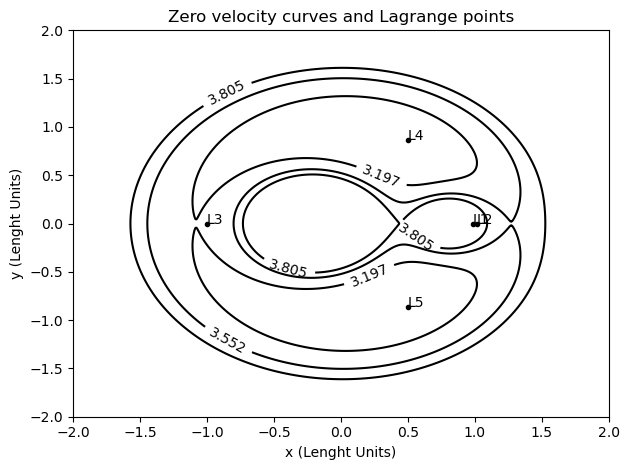

In [119]:
fig, ax = plt.subplots()
lines = ax.contour(X,Y,Cj,levels = [3.197,3.552,3.805],colors = 'k')
ax.clabel(lines)
for i in range(5):
    if i < 3:
        ax.plot(L[i],0,'ko',markersize = 3,)
        ax.text(L[i],0,'L{}'.format(i+1))
    else:
        ax.plot(L[i][0],L[i][1],'ko',markersize = 3)
        ax.text(L[i][0],L[i][1],'L{}'.format(i+1))
ax.set_xlabel('x (Lenght Units)')
ax.set_ylabel('y (Lenght Units)')
ax.set_title('Zero velocity curves and Lagrange points')
plt.tight_layout()
plt.show()

**Animation of $-JC$ surfaces respect to $\mu$** 

The potential in the lagrange points is a function of the mass ratio $\mu$

We can see that these points are values of local maximum and minimum of potential

In [120]:
mu = np.linspace(0.000001,0.2,50)

fig, ax = plt.subplots(subplot_kw={'projection':'3d'})

def graph_jc(mu):
    ax.cla()
    mu1 = 1-mu
    mu2 = mu

    ## Find Jacobi constant 
    x = np.linspace(-1,2,100)
    y = np.linspace(-2,2,100)
    X,Y = np.meshgrid(x,y)

    r1 = np.sqrt((X+mu2)**2+Y**2)
    r2 = np.sqrt((X-mu1)**2+Y**2)

    Cj = X**2+Y**2+2*(mu1/r1+mu2/r2)
    Cj = np.where(-Cj > -6,Cj,np.nan)
    L = Crtbp.Lagrange(mu)

    # Create 3D map for x,y,JC
    ax.plot_surface(X,Y,-Cj,cmap = 'inferno')

    #Plot lagrange points location
    for i in range(5):
        if i < 3:  
            XL,YL = L[i],0
        else:
            XL,YL = L[i]

        r1 = np.sqrt((XL+mu2)**2 + YL**2)
        r2 = np.sqrt((XL-mu1)**2+YL**2)
        Cj = XL**2+YL**2+2*(mu1/r1+mu2/r2)
        ax.plot(XL,YL,-Cj,'ko',markersize = 5)
        ax.text(XL,YL,-Cj,'L{}'.format(i+1))

    ax.set_title(r'$\mu = {}$'.format(round(mu,3)))

    ax.set_zlim3d(-5,2)
    ax.view_init(50,-30,0)
    ax.set_axis_off()

anim = animation.FuncAnimation(fig, graph_jc,frames = mu, blit=False, interval=80,
                              repeat=True) 
plt.close()

In [121]:
#anim.save('resources/animations/jacobi_surface.mp4')

In [122]:
HTML("""
<video width="1200" height="400" controls>
#   <source src="resources/animations/jacobi_surface.mp4" type="video/mp4">
</video>
""")

### SECTION 3.7 Stability of Equilibrium Points

The Stability of equlibrium points is analyzed by creating small perturbations around the Lagrange Points and evaluating the behavior on time.

After create the perturbations we find that we can write the equations of movement with small displacements from the lagrange points $(X,Y)$.
\begin{equation} \tag{3.101}
\ddot{X}-2\dot{Y} = XU_{xx}+ YU_{xy} \qquad \ddot{Y}+2\dot{X} = XU_{xy}+ YU_{yy}
\end{equation}

Written in matrix form

\begin{equation} \tag{3.103}
 \mathbf{\dot{X}} = \left(\begin{array}{c}
\dot{X} \\
\dot{Y} \\
\ddot{X} \\
\ddot{Y}
\end{array}\right)=\left(\begin{array}{cccc}
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
U_{xx} & U_{xy} & 0 & 2\\
U_{xy} & U_{yy} & -2 & 0
\end{array}\right)\left(\begin{array}{l}
X\\
Y\\
\dot{X} \\
\dot{Y}
\end{array}\right) = \mathbf{AX}
\end{equation}
 

Let create a non similarity transformation:

$$
\mathbf{Y} = \mathbf{BX}
$$

We can derive the equation:


$$
\mathbf{\dot{Y}} = \mathbf{B\dot{X}}
$$

$$
\mathbf{B^{-1}\dot{Y}} = \mathbf{\dot{X}}
$$

$$
\mathbf{B^{-1}\dot{Y}} = \mathbf{AB^{-1}Y}
$$

Finally we can solve for $\mathbf{\dot{Y}}$

$$
\mathbf{\dot{Y}} = \mathbf{BAB^{-1}Y}
$$

The matrix  \mathbf{BAB^{-1}} have the eigenvalues of the matrix $\mathbf{A}$

$$
  \mathbf{\dot{Y}} = \mathbf{\Lambda Y}
$$

After some linear algebra explained in the book. The solution of $\mathbf{X}$ is:

$$
\left(\begin{array}{l}
X\\
Y\\
\dot{X} \\
\dot{Y}
\end{array}\right) = \left(\begin{array}{l}
\sum_{j = 1}^{4}\bar{\alpha_j}e^{\lambda_{j} t}\\
\sum_{j = 1}^{4}\bar{\beta_j}e^{\lambda_{j} t}\\
\sum_{j = 1}^{4}\bar{\alpha_j}\lambda_{j}e^{\lambda_{j} t} \\
\sum_{j = 1}^{4}\bar{\beta_j}\lambda_{j}e^{\lambda_{j} t}
\end{array}\right)
$$

Replacing in any of both equations

\begin{equation} \tag{3.125}
\sum_{j = 1}^4 = (\bar{\alpha}_j\lambda^2-2\bar{\beta_j}\lambda_j - U_{xx}\bar{\alpha_{j}}-U_{xy}\bar{\beta_j})e^{\lambda_jt} = 0
\end{equation}

We can find the trivial solution to this equation that gives the relationship between $\bar{\alpha_j}$ and $\bar{\beta_j}$

\begin{equation} \tag{3.126}
\bar{\beta_j} = \frac{\lambda_j^2-U_{xx}}{2\lambda_{j}+ U_{xy}}\bar{\alpha_j}
\end{equation}

The characteristic equation of $\bold{A}$ is given by:
$$
\lambda^4 + (4 - U_{xx} - U_{yy})\lambda^2 + U_{xx}U_{yy} - U_{xy}^2 = 0
$$

In real cases we have the values of position and not the derivatives of potential. Then is useful to define the variables:

\begin{equation} \tag{3.128}
\bar{A} = \frac{\mu_1}{(r_1^3)_0} + \frac{\mu_2}{(r_2^3)_0}
\end{equation}

\begin{equation} \tag{3.129}
\bar{B} = 3\left[\frac{\mu_1}{(r_1^5)_0} + \frac{\mu_2}{(r_2^5)_0}\right]
\end{equation}

\begin{equation} \tag{3.130}
\bar{C} = 3\left[\mu_1\frac{(x_0+ \mu_2)}{(r_1^5)_0} + \mu_2\frac{(x_0 - \mu_1)}{(r_2^5)_0}\right]y_0
\end{equation}

\begin{equation} \tag{3.131}
\bar{D} = 3\left[\mu_1\frac{(x_0+ \mu_2)^2}{(r_1^5)_0} + \mu_2\frac{(x_0 - \mu_1)^2}{(r_2^5)_0}\right]
\end{equation}

(The subindex $0$ denotes position to the equilibrium point)

With these variables the derivatives of potential can be written as:

\begin{equation} \tag{3.132}
U_{xx} = 1 - \bar{A} + \bar{D}
\end{equation}

\begin{equation} \tag{3.133}
U_{yy} = 1 - \bar{A} + \bar{B}
\end{equation}

\begin{equation}  \tag{3.134}
U_{xy} = \bar{C}
\end{equation}

In [123]:
def potentials(mu,L):

    x0, y0 = Crtbp.Lagrange(mu, point=L) if type(Crtbp.Lagrange(mu, point=L)
                                                     ) == list else [Crtbp.Lagrange(mu, point=L), 0]
    mu1 = 1 - mu
    mu2 = mu
    r10 = np.sqrt((x0+mu2)**2+ y0**2)
    r20 = np.sqrt((x0-mu1)**2+ y0**2)
    A = mu1/r10**3 + mu2/r20**3
    B = 3*(mu1/r10**5 + mu2/r20**5)*y0**2
    C = 3*(mu1*(x0+mu2)/r10**5 + mu2*(x0-mu1)/r20**5)*y0
    D = 3*((mu1*(x0+mu2)**2)/r10**5 + (mu2*(x0-mu1)**2)/r20**5)

    Uxx = 1 - A  + D
    Uyy = 1 - A  + B
    Uxy = C 
    return Uxx,Uyy,Uxy

The eigenvalues are 
\begin{equation} \tag{3.121}
\lambda_{1,2} = \pm\left[\frac{1}{2}(U_{xx} + U_{yy} - 4) - \frac{1}{2}\left[(4- U_{xx} - U_{yy})^2 - 4(U_{xx}U_{yy}-U_{xy}^2)\right]^{1/2} \right]^{1/2}
\end{equation}

\begin{equation} \tag{3.121}
\lambda_{3,4} = \pm\left[\frac{1}{2}(U_{xx} + U_{yy} - 4) + \frac{1}{2}\left[(4- U_{xx} - U_{yy})^2 - 4(U_{xx}U_{yy}-U_{xy}^2)\right]^{1/2} \right]^{1/2}
\end{equation}


The value of square root can be negative and generate imaginary values. This is why the general form of eigenvalues are:

\begin{equation} \tag{3.135}
\lambda_{1,2} = \pm(j_1 + ik_1) \qquad \text{and} \qquad \lambda_{3,4} = \pm(j_2 + ik_2)
\end{equation}

Where $j_1,j_2,k_1,k_2$ are real 

In [124]:
def eigenvalues(Uxx,Uyy,Uxy):
        
    aux1 = (1/2)*(Uxx+Uyy-4)
    aux2 = (1/2)*np.sqrt((4-Uxx-Uyy)**2 - 4*(Uxx*Uyy-Uxy**2 + 0j))
    lambda1, lambda2,= np.sqrt(aux1 - aux2+ 0j), - np.sqrt(aux1 - aux2 + 0j)
    lambda3, lambda4 = np.sqrt(aux1 + aux2 + 0j), - np.sqrt(aux1 + aux2 + 0j)
    lambdas = np.array([lambda1,lambda2,lambda3,lambda4])
    return lambdas

The solution of the linear equations system can be done with the function that represent the whole process

In [125]:
def equation_system(Uxx,Uyy,Uxy,X0,Y0,lambdas):
    betas = (lambdas**2-Uxx)/(2*lambdas+Uxy)
    IC = np.zeros(4)
    IC[:2] = X0
    IC[2:] = Y0
    coefficients = np.array([[1,1,1,1],lambdas,betas,betas*lambdas])
    result = np.array(IC)
    alphas =  np.linalg.solve(coefficients,result)
    betas_solution = alphas*betas
    return alphas,betas_solution

The reference has a difference in  equation  $(3.138)$
$$
\mathbf{X(t)} = 6.99\times 10^{-6}e^{-2.90t} + 4.96\times 10^{-6}e^{+2.90t} + 1.96\times 10^{-6} \cos(2.32t) + 2.54\times 10^{-6}\sin(2.32t)
$$


If we replace $t = 0$ the result should be $1 \times 10^{-5}$ because this is an initial condition in the system. 
but the replacement gives $\mathbf{x(0)} =  1.39 \times 10^{-5} $

The change

$$
\mathbf{X(t)} = 6.99\times 10^{-6}e^{-2.90t} + 4.96\times 10^{-6}e^{+2.90t} - 1.96\times 10^{-6} \cos(2.32t) + 2.54\times 10^{-6}\sin(2.32t)
$$

gives the correct value to the initial conditions $X_0 =10^{-5}$

All this process is simplified in the method **stability** that returns the function of $X$ and $Y$ in terms of time

In [126]:
mu = 0.01
X0,Y0 = 1e-5,1e-5
X0D,Y0D = 0,0
La = 1
X,Y,lambdas =  Crtbp.stability([X0,Y0],[X0D,Y0D],mu,1,eigenvalues = True)

We can obtain a similar graphic as the **FIG 3.12** making variations in $\mu_2$

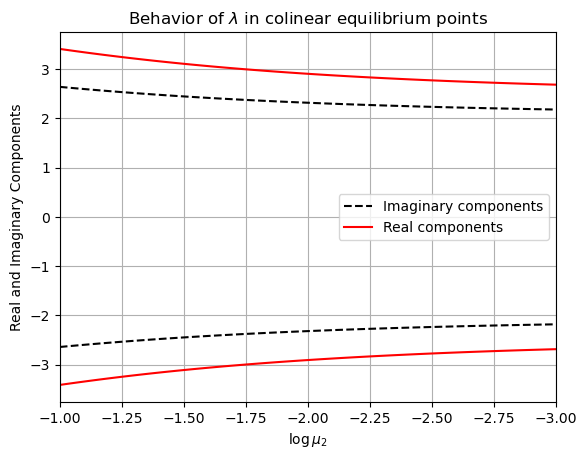

In [127]:
mus = np.logspace(-1,-3,100)

lambda1imag = np.zeros(100) 
lambda2imag = np.zeros(100) 
lambda3real = np.zeros(100) 
lambda4real = np.zeros(100) 
for i in range(len(mus)):
    X,Y,lambdas = Crtbp.stability([X0,Y0],[X0D,Y0D],mus[i],La,eigenvalues = True)
    lambda1imag[i] = lambdas[0].imag
    lambda2imag[i] = lambdas[1].imag
    lambda3real[i] = lambdas[2].real
    lambda4real[i] = lambdas[3].real

plt.plot(np.log10(mus),lambda1imag,'--k',label = 'Imaginary components')
plt.plot(np.log10(mus),lambda2imag,'--k')
plt.plot(np.log10(mus),lambda3real,'r',label = 'Real components')
plt.plot(np.log10(mus),lambda4real,'r')
plt.grid()
plt.legend()

plt.xlim(np.log10(0.1),np.log10(0.001))

plt.xlabel(r"$\log{\mu_2} $")
plt.ylabel('Real and Imaginary Components')
plt.title('Behavior of $\lambda$ in colinear equilibrium points')
plt.title
plt.show()


Is important to see that for every value of $\mu_2$ the equation has complex and real part, then it will always be a exponent that will growth with time and making the orbits unstable

In [128]:
X,Y,lambdas = Crtbp.stability([X0,Y0],[X0D,Y0D],mu,4,eigenvalues = True)

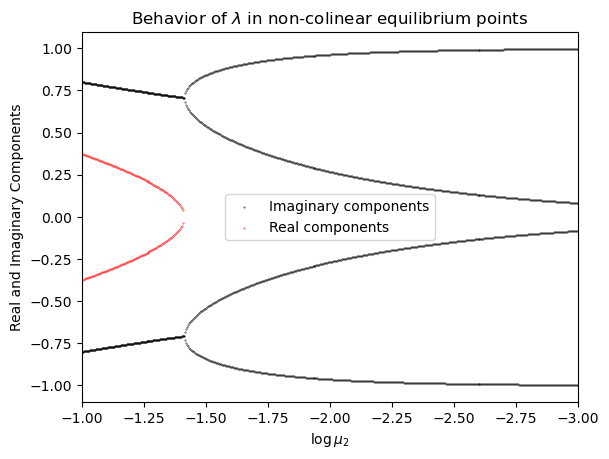

In [129]:
mus = np.logspace(-1,-3,500)
N = len(mus)

lambdaiimag = np.zeros((4,N))

lambda3real = np.zeros(N) 
lambda4real = np.zeros(N) 
X0 = Y0 = 1e-5
X0D = Y0D = 0
La = 4

for i in range(len(mus)):
    X,Y,lambdas = Crtbp.stability([X0,Y0],[X0D,Y0D],mus[i],La,eigenvalues = True)
    for k in range(4):
        lambdaiimag[k][i] = lambdas[k].imag
    lambda3real[i] = lambdas[2].real
    lambda4real[i] = lambdas[3].real

s = 0.1

plt.scatter(np.log10(mus),lambdaiimag[0],s = s,c = 'k',label = 'Imaginary components')
for i in range(1,4):
    plt.scatter(np.log10(mus),lambdaiimag[i],s = s,c = 'k')

index = np.where(lambda4real != 0)[0]

plt.scatter(np.log10(mus)[:index[-1]],lambda3real[:index[-1]],s = s,c = 'r',label = 'Real components')
plt.scatter(np.log10(mus)[:index[-1]],lambda4real[:index[-1]],s = s,c = 'r')

plt.legend()

plt.xlim(np.log10(0.1),np.log10(0.001))

plt.xlabel(r"$\log{\mu_2} $")
plt.ylabel('Real and Imaginary Components')
plt.title('Behavior of $\lambda$ in non-colinear equilibrium points')
plt.title
plt.show()

When the $\log \mu_2 > 1.4$ the solution is always imaginary and the orbits become stable from this point

### SECTION 3.8 Motion near  $L_4$ and $L_5$

The solution for orbits with $\log \mu_2 > 1.4$ brings the combination of two periodics movements, resulting a short period motion  and a superimposed longer period known as libration.

If we want the solution to be stable, the eigenvalues must be purely imaginaries and in order to be real the solution for $X$ and $Y$. the constants $\alpha$ should come in pairs conjugated

The solution for $X$ takes the form 

\begin{align} 
X =& (a+bi)e^{\lambda_1 i t} +  (a-bi)e^{-\lambda_1 i t} + (c+di)e^{\lambda_2 i t} + (c-di)e^{-\lambda_2 i t} \\

 =& a(e^{\lambda_1 i t}+e^{-\lambda_1 i t}) + bi(e^{\lambda_1 i t}-e^{-\lambda_1 i t})+c(e^{\lambda_2 i t}+e^{-\lambda_2 i t})+di(e^{\lambda_2 i t}-e^{-\lambda_2 i}) \\
 =& 2a\cos{\lambda_1 t} - 2b\cos{\lambda_1 t} + 2c\cos{\lambda_2 t} - 2d\cos{\lambda_2 t}
\end{align}

The solution for $X$ (and in similar way to $Y$) has two differents components

The solution is simplified if we rotate the system  by 30° to be nearly tangential to the unit circle

The next process is similar to the one in the function **stability** but to extract the values of  $\alpha$ and $\beta$

In [130]:
def stability_specific(mu,X0,Y0,X0dot,Y0dot,L):
    Uxx, Uyy, Uxy = potentials(mu,L)
    lambdas = eigenvalues(Uxx,Uyy,Uxy)

    alphas, betas = equation_system(Uxx,Uyy,Uxy,[X0,X0dot],[Y0,Y0dot],lambdas)

    return  alphas,betas,lambdas

In [131]:
X,Y,lambdas = Crtbp.stability([X0,Y0],[X0D,Y0D],mu = 0.01,L = 4,eigenvalues = True)
alphas,betas,lambdas = stability_specific(0.01,X0,Y0,X0D,Y0D,4)


In [132]:
t = np.linspace(0,50,200)

We obtain the perturbation generated by each one of the eigenvalues (two differents) and see how this affects the general motion

In [133]:
X1 = lambda t :2*alphas[0].real*np.cos(lambdas[0].imag* t)-2*alphas[0].imag*np.sin(lambdas[0].imag* t)

Y1 = lambda t :2*betas[0].real*np.cos(lambdas[0].imag* t)-2*betas[0].imag*np.sin(lambdas[0].imag* t)

X2 = lambda t :2*alphas[2].real*np.cos(lambdas[2].imag* t)-2*alphas[2].imag*np.sin(lambdas[2].imag* t)

Y2 = lambda t :2*betas[2].real*np.cos(lambdas[2].imag* t)-2*betas[2].imag*np.sin(lambdas[2].imag* t)


In [134]:
fig, axs = plt.subplots(1,3, figsize = (10,5),tight_layout = True)

XS = (X,X1,X2)
YS = (Y,Y1,Y2)

Xmax = (X(t).max(),X1(t).max(),X2(t).max())
Xmin = (X(t).min(),X1(t).min(),X2(t).min())

Ymax = (Y(t).max(),Y1(t).max(),Y2(t).max())
Ymin = (Y(t).min(),Y1(t).min(),Y2(t).min())

def graph_stability(i):
    for k in range(3):
        axs[k].cla()
        axs[k].plot(XS[k](t).real,YS[k](t).real,"--k",alpha = 0.3)
        axs[k].plot(XS[k](t[i]),YS[k](t[i]),".k")
        axs[k].set_xlabel(r"$X$")
        axs[k].set_ylabel(r"$Y$")
        axs[k].set_xlim(Xmin[k],Xmax[k])
        axs[k].set_ylim(Ymin[k],Ymax[k])
        axs[k].set_xlabel(r"$x_{\lambda_1}$")
        axs[k].set_ylabel(r"$y_{\lambda_1}$")
    axs[k].set_title('Perturbed Orbit')
    axs[k].set_title(r"Ellipse of Frecuency $\lambda_1$")
    axs[k].set_title(r"Ellipse of Frecuency $\lambda_2$")

    

anim = animation.FuncAnimation(fig, graph_stability,frames = np.arange(1,len(t)), blit=False, interval=50,
                              repeat=True) 
plt.close()

In [135]:
#anim.save('resources/animations/Motion_near_L4.mp4')

The motion has two components. The one with frequency $\lambda_1$, bigger and with a minor amplitude and is responsible for the swinging and the second one with frequency $\lambda_2$ smaller and with wide amplitude, this last one is responsible for the general motion and extension of the orbit

In [136]:
HTML("""
<video width="1200" height="400" controls>
#   <source src="resources/animations/Motion_near_L4.mp4" type="video/mp4">
</video>
""")

### SECTION 3.9 Tadpole and Horseshoe Orbits

Althought this description is only valid for small displacements for L4 and L5, this can be also see by integrating the equations of motion. This is why the initial conditions are give near the point L3

When it is a small displacement the orbit oscilates around the equilibrium point, when the displacement is bigger the orbit moves in a bigger angle 

In [150]:
mu = 0.001
x0 = 1/2-mu
y0 = np.sqrt(3)/2
IC1 = np.array([x0+0.0065,y0+0.0065,0,0,0,0])
IC2 = np.array([x0+0.008,y0+0.008,0,0,0,0])

Yrot1,t_span1 = Crtbp(IC1,mu).propagate(15*2*np.pi,500)
Yrot2, t_span2 = Crtbp(IC2,mu).propagate(15*2*np.pi,500)

The same behavior can be observed in the point $L_5$

In [151]:
IC1 = np.array([x0+0.0065,-y0-0.0065,0,0,0,0])
IC2 = np.array([x0+0.008,-y0-0.008,0,0,0,0])

Yrot1_minus,t_span1 = Crtbp(IC1,mu).propagate(15*2*np.pi,500)
Yrot2_minus, t_span2 = Crtbp(IC2,mu).propagate(15*2*np.pi,500)

In [152]:
Y1 = [Yrot1,Yrot1_minus]
Y2 = [Yrot2,Yrot2_minus]

We can show the behavior for $L_4$ and $L_5$

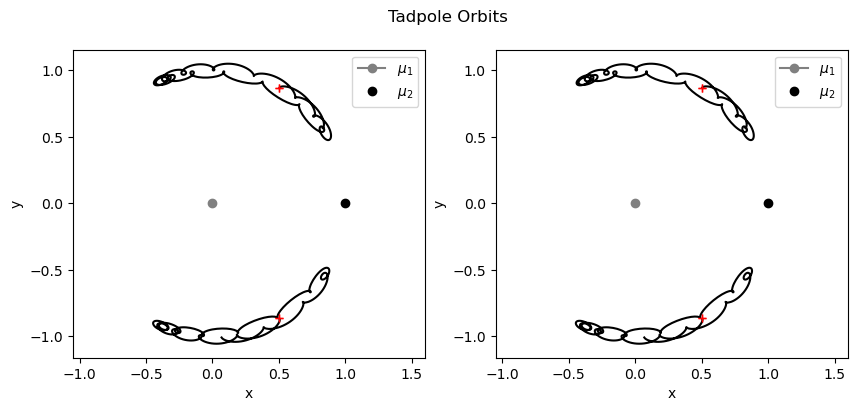

In [154]:
fig, (axs) = plt.subplots(1,2,figsize = (10,4))
fig.suptitle('Tadpole Orbits')

for i in range(2):
    for k in range(2):
        axs[i].plot(Y1[k][0,:],Y1[k][1,:],'k-')
        axs[i].plot(x0,y0,'r+')
        axs[i].plot(x0,-y0,'r+')
        axs[i].axis('equal')
        axs[i].set_xlabel('x')
        axs[i].set_ylabel('y')
    axs[i].plot(-mu,0,'gray',marker='o',label = r'$\mu_1$')
    axs[i].plot(1-mu,0,'ko',label = r'$\mu_2$')
    axs[i].legend()
plt.show()


When the perturbation is bigger, the L4 will encompase with L5 and create the horseshoe orbits ,those one used as example are not propagate from the perturbation near lagrange point, it is not used the function found for perturbation but the method to general propagation

In [141]:
IC1 = [-0.97668,0,0,0,-0.06118,0]
IC2 = [-1.02745,0,0,0,0.04032,0]
mu = 0.000953875
Yrot1,t_span1 = Crtbp(IC1,mu).propagate(200,5000)
Yrot2, t_span2 = Crtbp(IC2,mu).propagate(200,5000)

Y = [Yrot1,Yrot2]

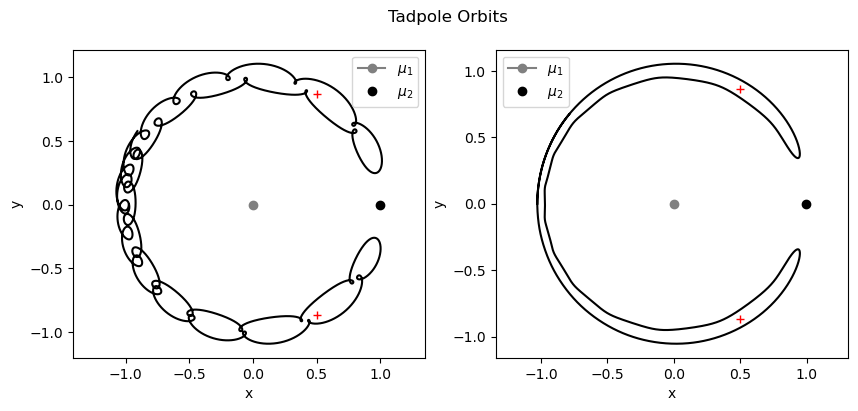

In [142]:
fig, (axs) = plt.subplots(1,2,figsize = (10,4))
fig.suptitle('Tadpole Orbits')
for i in range(2):
    axs[i].plot(Y[i][0,:],Y[i][1,:],'k-')
    axs[i].plot(-mu,0,'gray',marker='o',label = r'$\mu_1$')
    axs[i].plot(1-mu,0,'ko',label = r'$\mu_2$')
    axs[i].plot(x0,y0,'r+')
    axs[i].plot(x0,-y0,'r+')
    axs[i].axis('equal')
    axs[i].set_xlabel('x')
    axs[i].set_ylabel('y')
    axs[i].axis('equal')
    axs[i].legend()
    
plt.show()


### SECTION 3.10 Orbits and Zero-Velocity curves

The analysis of the zero velocity curves around the Lagrange point $L_4$ and $L_5$ shows the region allowed is tilted $30°$ and can be also be simplified with a translation to the $L_4$ point


After the translation the new coordinates are:

$$
x' = (\frac{1}{2}-\mu_2) + x
$$
$$
y' = \frac{\sqrt{3}}{2}+ y
$$



And after the rotation:

$$
x = \frac{\sqrt{3}}{2}x'+\frac{y'}{2}
$$
$$
y' = \frac{-x'}{2}+ \frac{\sqrt{3}}{2}y'
$$

Where $x'$ and $y'$ are the values after the translation

Replacing in the positions respect the bodies

\begin{equation} \tag{3.154}
r_1^2 = 1 + 2y' + x'^2 + y'^2
\end{equation}

\begin{equation} \tag{3.155}
r_2^2 = 1 - \sqrt{3}x' + y' + x'^2 + y'^2
\end{equation}

After replace in the Jacobi integral equation and neglecting terms of order three and higher and terms with $\mu_2y'$ since $\mu_2$ is assumed a small quantity

The Jacobi Constant for tadpole movement can be written as 
\begin{equation} \tag{3.158}
C_j = 3 + \gamma \mu_2
\end{equation}
where $\gamma$ is a small quantity equal to $1$ and $-1$ at the $L_4$ and $L_5$ points

And for the Horseshoe movement:

\begin{equation} \tag{3.161}
C_j = 3 + \zeta\mu_2^{2-/3} + O(2)
\end{equation}

Where

\begin{equation} \tag{3.154}
0 < \zeta < 3^{4/3}
\end{equation}

We can use the expression for potential 
\begin{equation} \tag{3.163}
2U = 2\frac{\mu_1}{r_1} + \mu_1 r_1^2 +  2\frac{\mu_2}{r_2} + \mu_2 r_2^2 - \mu_1 \mu_2
\end{equation}

Written in polar coordinates the general expression for the jacobi integral with velocity

\begin{equation} \tag{3.164}
v^2  = \dot{r}^2 + (r\dot{\theta})^2 = 2U - C_j
\end{equation}

Using the same aproximation and considering $r = 1 + \delta r$

\begin{equation} \tag{3.167}
2U = 3 + \delta r^2 + \mu_2 H 
\end{equation}

Where 
\begin{equation} \tag{3.168}
H = \frac{2}{r_2} + r_2^2 - 4
\end{equation}

Following the procedure we get in the book's section we obtain

\begin{equation} \tag{3.179}
H(\theta) = \left(\sin{\frac{\theta}{2}}\right)^{-1} -2\cos{\theta} -2
\end{equation}

In [143]:
def H(theta):
    return np.sin(theta/2)**(-1) - 2*np.cos(theta) - 2

With these we can find the closest approach of the secondary 

\begin{equation} \tag{3.183}
\delta r_{180}^2 = \frac{4}{3}\mu_2[H(\theta_{min})-1]
\end{equation}


In [144]:
def deltar(H,mu):
    return np.sqrt(abs(4/3*mu*(1-H)))

For any value of $\mu$ the minimum distance of the satelite is $\theta = 23.5°$

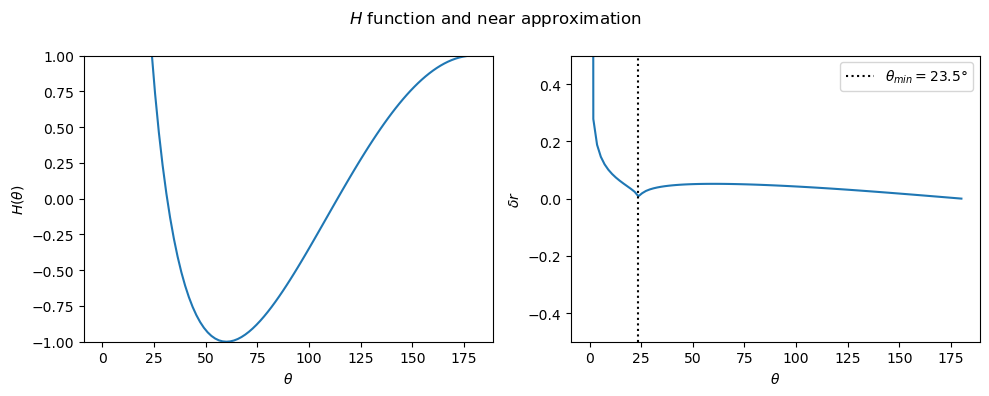

In [155]:
theta = np.linspace(1e-5,np.pi,100)
fig, (ax,ax1) = plt.subplots(1,2,figsize = (10,4),tight_layout = True)
fig.suptitle(r'$H$ function and near approximation')

ax.plot(np.rad2deg(theta), H(theta))
ax.set_ylim(-1,1)
ax.set_xlabel(r"$\theta$")
ax.set_ylabel(r"$H(\theta)$")

mu = 0.001
ax1.plot(np.rad2deg(theta), deltar(H(theta),mu))
ax1.set_ylim(-0.5,0.5)
ax1.set_xlabel(r"$\theta$")
ax1.set_ylabel(r"$\delta r$")
ax1.axvline(23.5,c = 'k',linestyle = ":",label = r"$\theta_{min} = 23.5°$")
ax1.legend()

plt.show()

We can see that as the references indicates, the point of minimum approach is in $\theta = 23.5°$

### SECTION 3.13 HILLS EQUATION

The major orbital perturbations occur in encounters with the secondary mass.

Is useful to work with a system of equations that describe the motion of a particle in  the vicinity of the secondary mass

For small mass ratio $\mu_1 \approx 1$

the equations of motion in the synodic frame pass from 

\begin{equation} \tag{3.200}
\ddot{x}-2  \dot{y}- x  =-\left[\mu_1 \frac{x+\mu_2}{r_1^3}+\mu_2 \frac{x-\mu_1}{r_2^3}\right] 
\end{equation}

\begin{equation} \tag{3.200}
 \ddot{y}+2  \dot{x}- y  =-\left[\frac{\mu_1}{r_1^3}+\frac{\mu_2}{r_2^3}\right] y 
\end{equation}

(If we consider the planar equation of movement)

$$
\ddot{x} - 2\dot{y}-x = -\frac{x}{r_1^3}-\mu_2\frac{x-1}{r_2^3}
$$
$$
\ddot{y} + 2\dot{x}-y = -\frac{y}{r_1^3}-\mu_2\frac{y}{r_2^3}
$$

Using the transformation $x \to x + 1$ and keeping the same $y$.

We need to consider also that if we move close to the satellite $x,y$ and $\Delta = r_2$ will be small

In the first equation 

$$
\ddot{x} - 2\dot{y} =(x+1)\left(1 -\frac{1}{r_1^3}\right) -\mu_2\frac{x-1}{\Delta^3}
$$


Aplying those approximation in $r_1$
$r_1= \sqrt{(x + 1)^2 + y^2} \approx (1+2x)^{1/2}$

And $r_1^3 \approx (1+2x)^{-3/2} \approx 1-3x$


\begin{equation} \tag{3.202}
\ddot{x} - 2\dot{y} =\left(3-\mu_2\frac{1}{\Delta^3}\right)x = \frac{\partial U_H}{\partial x}
\end{equation}

In the second equation 

$$
\ddot{y} + 2\dot{x}-y = -\frac{y}{r_1^3}-\mu_2\frac{y}{\Delta^3} 
$$

$$
\ddot{y} + 2\dot{x} = y\left(1-\frac{1}{r_1^3}\right)-\mu_2\frac{y}{\Delta^3} \approx 3yx-\mu_2\frac{y}{\Delta^3} 
$$

The product of those two small values $x$ and $y$ can be neglected

\begin{equation} \tag{3.203}
\ddot{y} + 2\dot{x} = -\mu_2\frac{y}{\Delta^3} = \frac{\partial U_H}{\partial y}
\end{equation}

Where
\begin{equation} \tag{3.204}
U_H = \frac{3}{2}x^2 + \frac{\mu_2}{\Delta}
\end{equation}

This $U_H$ is equivalent to the scalar function $U$ in the original problem

\begin{equation} \tag{3.205}
C_j = 3x^2 + 2\frac{\mu_2}{\Delta}-\dot{x}^2-\dot{y}^2
\end{equation}

When $\Delta^3 = \frac{\mu_2}{3}$ the radial force vanishes. This region leads the definition of *Hill Sphere*

\begin{equation} \tag{3.207}
\Delta_H = \left(\frac{\mu_2}{3}\right)^{1/3}
\end{equation} 

The lagrange points can be find setting no velocity and no aceleration for $x$ or $y$ and we find that the location is the same hill radius
$$
\Delta_{L1,L2} = (\mu_2/3)^{1/3}
$$

In the equation of Jacobi constant replacing  the conditions give

$$
C_H = 3^{4/3}\mu_2^{2/3}
$$

We can Show a plot similar to the **FIG 3.28** of the zero velocity curves using a method already used in this notebook. First we find the curve levels of the Jacobi  constant in Hill regime and plot them

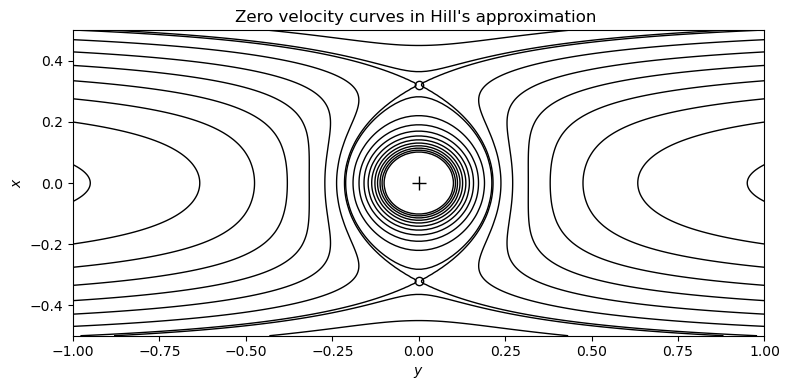

In [146]:
x = np.linspace(-0.5,0.5,200)
y = np.linspace(-1.5,1.5,200)

X,Y = np.meshgrid(x,y)

mu = 0.1
CJ_Hill_Grid = Crtbp.get_Hill_JC([X,Y],mu)

L1 = (mu/3)**(1/3)
L2 = -L1

levels = list(np.linspace(0,2,20))
levels.append(0.932)  ## This level is the cross  in Hill radius for the specific mass ratio
levels.sort()
fig, ax = plt.subplots(figsize = (8,4),tight_layout = True)
lines = ax.contour(Y,X,CJ_Hill_Grid,levels =levels,colors = 'k',alpha = 1,linewidths =1)
ax.set_xlim(-1,1)
ax.set_ylim(-0.5,0.5)
ax.plot(0,0,'k+',markersize = 10)
ax.plot(0,L1,'ko',fillstyle = 'none')
ax.plot(0,L2,'ko',fillstyle = 'none')
ax.set_xlabel(r'$y$')
ax.set_ylabel(r'$x$')
ax.set_title("Zero velocity curves in Hill's approximation ")
plt.show()

We can write the expression for Jacobi constant in Lagrange point as:

\begin{equation} \tag{3.208}
C_H = \zeta  \mu_2^{2/3}
\end{equation}

The horseshoe motion is possible if the particle can move away from the sattelite, this is possible when $\zeta < 3^{4/3}$

For orbits near circular $\dot{x} = \ddot{x} = \ddot{y} = 0$

In the Jacobi equation
\begin{equation} \tag{3.209}
\dot{y}^2 = 3x^2 - \zeta \mu_2^{2/3}
\end{equation}

If the movement is circular $\dot{y} = -\frac{3}{2}x$ and
$$
x^2 = \frac{4}{3}\zeta \mu_2^{2/3}
$$

The zero velocity curve related to this equation is described by the value $x_{zv}$

\begin{equation} \tag{3.210}
x_{zv}^2 = \frac{1}{3}\zeta \mu_2^{2/3}
\end{equation}

The tisserand criterion can also be used with this Hill equations

From the equations of movement considering $\Delta$ large.

\begin{equation} \tag{3.215}
\ddot{x} - 2\dot{y} = 3x
\end{equation}

\begin{equation} \tag{3.216}
\ddot{y} + 2\dot{x} = 0
\end{equation}

And from the relations to Jacobi constants given above

\begin{equation} \tag{3.217}
\dot{x}^2+\dot{y}^2= 3x^2 - \zeta  \mu_2^{2/3} 
\end{equation}


Using the guiding centre approximation.
We can write $x = \delta a + e\sin{t}$ and $\ddot{y} = -2e\cos{t}$

We can replace in the tisserand equation to get

\begin{equation} \tag{3.218}
\dot{y} = -\frac{3}{2}\Delta a - 2e\sin{t}
\end{equation}

Replacing this and the derivatives in the jacobi form we have

\begin{equation} \tag{3.219}
e^2\cos^2{t}+ \left( -\frac{3}{2}\Delta a - 2e\sin{t}\right)^2 = 3(\Delta a + e\sin{t})^2 - \zeta \mu_2^{2/3}
\end{equation}

Simplifying we get
\begin{equation} \tag{3.220}
\frac{3}{4}\Delta a^2 - \Delta e^2 = \zeta \mu_2^{2/3}
\end{equation}

The minimum distance from the secondary mass is in the $y$ crossing.

\begin{equation} \tag{3.221}
\dot{y}_0 = -\frac{3}{2}x_0 = -\frac{3}{2}\Delta a_0
\end{equation}

Replacing for the expression of Jacobi constant in eq **3.205**  gives

\begin{equation} \tag{3.223}
|\Delta a_0| = 2 (\zeta/3)^{1/2}\mu_2^{1/3}
\end{equation}

And finally in terms of $y_min$

\begin{equation} \tag{3.221}
y_{min} \approx \frac{8}{3}\Delta a_0^2\mu_2
\end{equation}

Finally the system scales as $\mu_2^{1/3}$

The system can be written doing transformation respect $\mu_2^{1/3}$

$$
x \to x'(\mu_2/3)^{1/3}
$$
$$
y \to y'(\mu_2/3)^{1/3}
$$
$$
\Delta \to \Delta'(\mu_2/3)^{1/3}
$$

\begin{equation} \tag{3.221}
\ddot{x}'-2\dot{y}' = 3x'\left(1 - \frac{1}{\Delta'^3} \right)
\end{equation}

\begin{equation} \tag{3.221}
\ddot{y}'+2\dot{x}' = -3\frac{y'}{\Delta'^3}
\end{equation}